In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Import dataset
df=pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# One-Hot Encoding for catagrical variables
df1=pd.get_dummies(df,columns=['job','marital','education','contact','poutcome','month'])
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# To see all columns
pd.set_option('display.max.columns',None)
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  Target               45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [8]:
# Custom Binary Encoding of Binary o/p variables


df1['default'] = np.where(df1['default'].str.contains("yes"), 1, 0)
df1['housing'] = np.where(df1['housing'].str.contains("yes"), 1, 0)
df1['loan'] = np.where(df1['loan'].str.contains("yes"), 1, 0)
df1['Target'] = np.where(df1['Target'].str.contains("yes"), 1, 0)
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  Target               45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [10]:
df1.shape

(45211, 49)

In [12]:
df1.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,-0.055717,-0.044002,0.021792,0.086650,-0.023571,0.447378,-0.008093,-0.065780,-0.197302,-0.068632,0.000412,0.050200,0.164674,0.286257,-0.427817,0.196182,-0.093979,-0.081629,0.069665,-0.068375,0.170349,-0.020132,-0.004927,-0.022967,0.035526,-0.000816,-0.028902,0.073844,0.022872,-0.001198,-0.007466,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419,-0.010037,0.010341,0.026281,-0.000359,-0.002655,-0.011290,0.004107,0.000068,-0.016222,-0.003089,0.006470,-0.006669,0.017777,-0.014460,0.003115,0.001623,0.013220,-0.015239,-0.001236,-0.010061,-0.017208,0.019933,-0.026389,-0.014445,-0.023344,0.039490,-0.028254,-0.007521,-0.009344,-0.009027,-0.006990,0.044257,0.007582,-0.013991,-0.002946,0.006129,-0.017454,-0.013953
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838,-0.026726,-0.048757,0.009642,0.001661,0.067797,0.046900,0.017850,-0.038151,0.001233,-0.016183,0.009023,0.010784,-0.021732,0.025708,-0.012537,-0.015451,-0.069937,0.084001,0.011181,0.015880,0.037999,-0.037331,0.011857,0.008466,0.035240,-0.030271,0.015593,0.008605,0.021594,-0.003537,-0.024421,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173,0.043046,0.177475,0.010600,-0.079380,-0.063382,-0.156633,-0.027319,0.070435,-0.085066,-0.012823,-0.048229,-0.075023,0.001778,0.017681,-0.020475,0.010671,0.101659,-0.099175,-0.047595,-0.156071,-0.080822,0.208409,0.106795,0.039710,-0.091360,-0.063755,0.079406,-0.305641,-0.050556,-0.064523,-0.066448,-0.061231,-0.102298,-0.066284,0.427980,0.001152,-0.085439,-0.076343
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185,0.030781,0.018291,0.039808,-0.017234,-0.038904,-0.014861,-0.007882,0.035575,-0.058503,0.014798,-0.035961,-0.031943,0.016377,0.036906,-0.051716,-0.012396,0.070625,-0.045940,-0.049992,0.013604,-0.013183,-0.007211,-0.002186,-0.009099,-0.053713,0.031406,-0.027371,-0.069359,-0.020459,-0.008842,-0.004450,0.167764,-0.022749,-0.029761,-0.027867,0.019154,-0.030097,-0.033663
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,-0.010455,-0.022898,-0.002312,0.003955,0.019021,-0.010123,0.005062,-0.006531,-0.015894,0.032517,-0.006382,-0.011199,-0.000433,0.007102,-0.007412,-0.019551,-0.005831,0.021730,0.000114,0.020186,0.023652,-0.034103,-0.068700,-0.032952,-0.030321,0.086256,0.047805,0.030131,-0.011368,-0.283326,0.250523,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521,-0.015722,0.009637,-0.001327,-0.008046,-0.008323,0.026032,0.007383,0.001427,-0.006504,-0.009176,0.020322,-0.006390,0.006100,-0.022683,0.020328,-0.003660,0.002084,0.000891,-0.000682,0.025543,-0.023201,-0.014379,-0.018925,-0.001958,0.042389,-0.003491,0.040838,-0.040054,0.019057,-0.009557,0.006989,0.016163,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.0

# Model Building

In [13]:
# dividing our data into input and output variables
x=pd.concat([df1.iloc[:,0:10],df1.iloc[:,11:]],axis=1)
y=df1.iloc[:,10]

In [14]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)

H:\Anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Predictions

In [15]:
# Predict for x dataset

y_pred=model.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [16]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Testing Model Accuracy

In [18]:
# confusion matrix for the model accuracy

from sklearn.metrics import confusion_matrix
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int32

In [19]:
y_pred=model.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
cm=confusion_matrix(y,y_pred)
cm

array([[39106,   816],
       [ 4086,  1203]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report,accuracy_score

In [24]:
accuracy_score(y,y_pred)

0.8915750591670168

In [26]:
# the model accuracy is calculated by (a+d)/(a+b+c+d)
(39033+1289)/(39033+889+4000+1289)

0.8918625998097808

In [28]:
# As accuracy =0.8933, which is greater than 0.5, thus [:,1] theshold value<0.5=0 
model.predict_proba(x)[:,1]

array([0.03470482, 0.02155339, 0.01751459, ..., 0.65393686, 0.06647465,
       0.14619863])

In [29]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.23      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.64     45211
weighted avg       0.87      0.89      0.87     45211



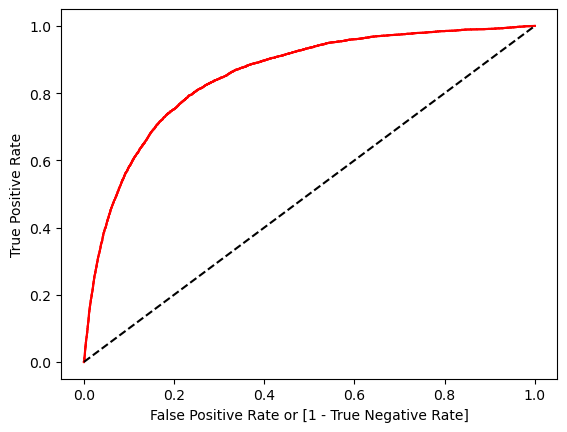

auc accuracy: 0.6035066735210235


In [32]:
# ROC curve plotting and finding AUC value


fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)